<h1>Hotel Booking Demand

<h3>Các thư viện kèm theo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=4a26e15a3b47380b354f899b65aac994a34fab6689d39bd7c5db03ea86990a2a
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=ef379750c9cc7185866f7f4e7953524edd8ed75a0336d7a5a20fbb972948f51d
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import missingno as msno
import folium
import plotly.express as px
import plotly.graph_objects as go
import sort_dataframeby_monthorweek as sd
import pickle

In [ ]:
from folium.plugins import HeatMap
from plotly.subplots import make_subplots
from scipy.stats.mstats import winsorize
from scipy import stats

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
RANDOM_STATE = 42

<h3>Đọc dữ liệu bài toán

<li>Đọc dữ liệu Hotel Booking Demand lấy từ Kaggle

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Năm 3/Làm nhóm HK2 2021 - 2022/Cá nhân/Khai thác dữ liệu/Project/DataCleaning/hotel_booking.csv")

<li>Xem 10 dòng dữ liệu đầu tiên của tập dữ liệu

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


<li>Xem xét dữ liệu ban đầu

<strong> Khối dữ liệu có thông tin như sau:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<strong>Tổng số dữ liệu null

In [ ]:
df.isnull().sum().sum()

129425

<strong>Trong đó, các thuộc tính và số lượng phần tử null trong các thuộc tính đó là

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<strong>Tỷ lệ dữ liệu null

In [ ]:
(df.isnull().sum().sum() / (119390 * 36)) * 100

3.01125629356637

<strong>Tỷ lệ từng thuộc tính có dữ liệu null

In [ ]:
(df.isnull().sum() / 119390) * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

<strong>Kết luận:

<p>- Tổng số dòng: 119 390 dòng
<p>- Tổng số cột: 36 cột
<p>- Tổng số lượng dữ liệu null: 129 425
<p>- Tỷ lệ số lượng dữ liệu null trong dataset: 3.01%
<p>- Có ba kiểu dữ liệu chính: object, int64, float64.
<p>- Trong đó, dữ liệu về thông tin chi tiết của khách hàng là dữ liệu ảo để đảm bảo độ bảo mặt về thông tin của du khách.

<li>Thống kê chỉ số của các thuộc tính định lượng như: đếm số giá trị, giá trị lớn nhất, giá trị nhỏ nhất, trung bình, độ lệch chuẩn và tứ phân vị (thứ nhất, thứ hai, thứ ba)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


<li>Thống kê thông tin của các thuộc tính định tính như: đếm số giá trị, số lượng các giá trị khác nhau trong từng biến, giá trị có tần số xuất hiện cao nhất trong biến đó và tần số của giá trị đó.

In [ ]:
df.describe(include = "object").T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


<li>Thống kê dữ liệu giá trị NaN

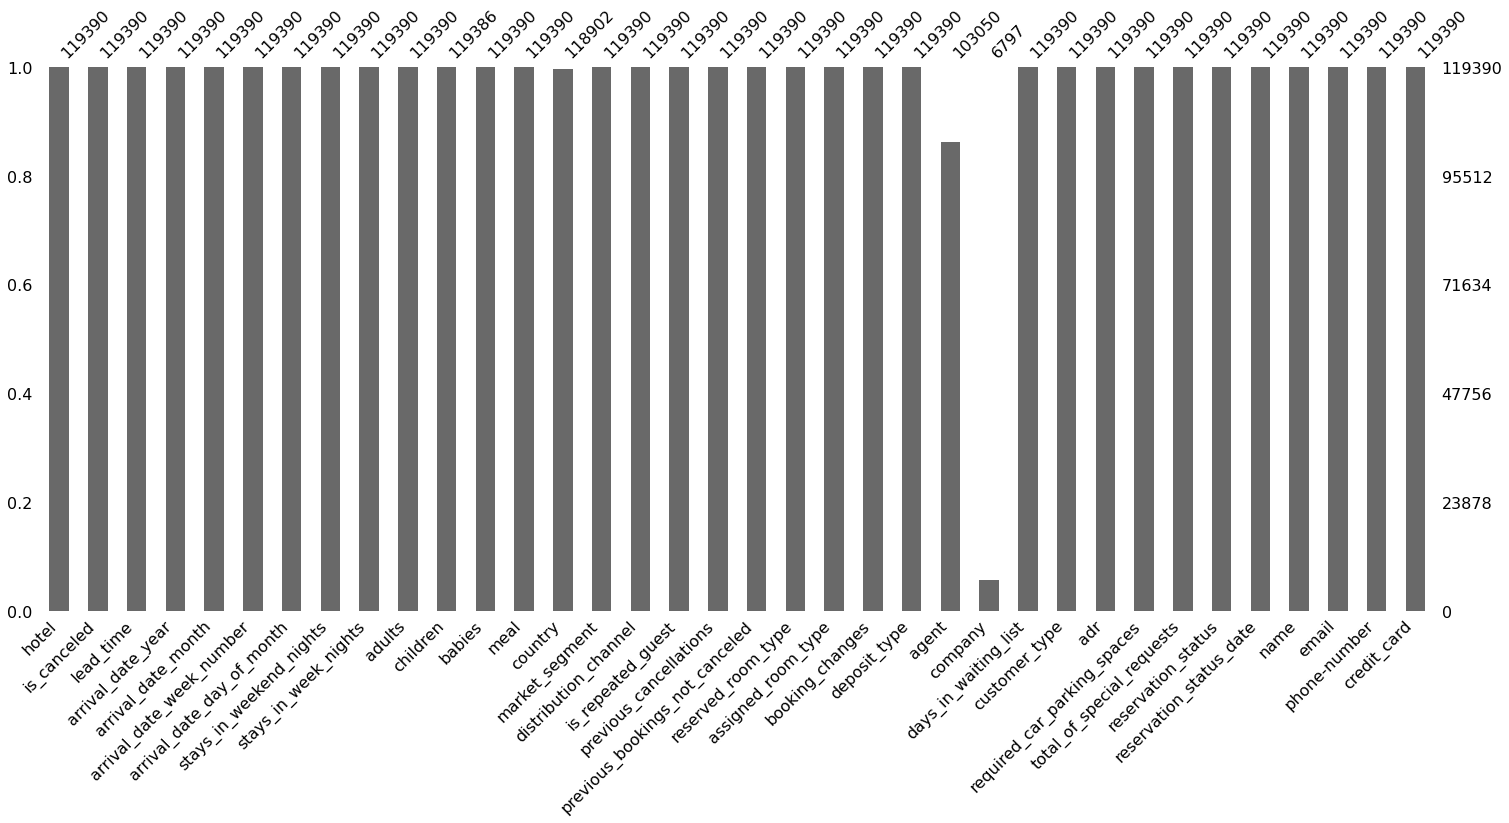

In [ ]:
msno.bar(df)
plt.show()

<strong>Kết luận

<p>Sau khi xem nhanh tập dữ liệu, ta đã có những hiểu biết ban đầu về các biến và định dạng của chúng.

<h3>Tiến hành phân tích trước khi biến đổi dữ liệu và xóa thuộc tính của dataset

<li>Thống kê loại hình khách sạn nào thu hút nhiều khách hàng nhất 

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
labels = ["Resort Hotel", "City Hotel"]
hotel = df.hotel.value_counts().sort_values()
hotel

Resort Hotel    40060
City Hotel      79330
Name: hotel, dtype: int64

In [ ]:
colors = ['gold', 'mediumturquoise']

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=hotel)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

<strong>Kết luận: </strong>

<p>- Khách sạn thành phố (City Hotel) được đặt phòng nhiều nhất
<p>- Lượt hủy đặt phòng của "City Hotel" cao hơn so với "Resort Hotel", chiếm gần 50% lượng đăng ký thuê phòng trước nên sẽ mang đến nhiều ảnh hưởng tiêu cực đến City Hotel

In [ ]:
canceled = df[df['is_canceled']==1][['hotel']]
canceled = canceled.hotel.value_counts().sort_values()

not_canceled = df[df['is_canceled']==0][['hotel']]
not_canceled = not_canceled.hotel.value_counts().sort_values()

In [ ]:
canceled

Resort Hotel    11122
City Hotel      33102
Name: hotel, dtype: int64

In [ ]:
not_canceled

Resort Hotel    28938
City Hotel      46228
Name: hotel, dtype: int64

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=canceled, name="Canceled"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=not_canceled, name="Check-in"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Distribution of Checkin and Canceled reservations by Hotel Type",
    annotations=[dict(text='Canceled', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Check-in', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

<li>Thống kế tỷ lệ số lượt đặt phòng thành công hoặc bị hủy

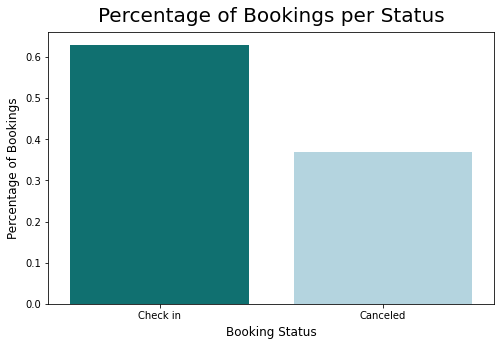

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'].unique(), y=df['is_canceled'].value_counts(normalize=True), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Check in', 'Canceled']);

<strong>Kết luận

<p>- Khoảng hơn một phần ba lượt đặt phòng bị hủy bỏ

<li>Tỷ lệ các trạng thái đăng ký khi hủy phòng thành công

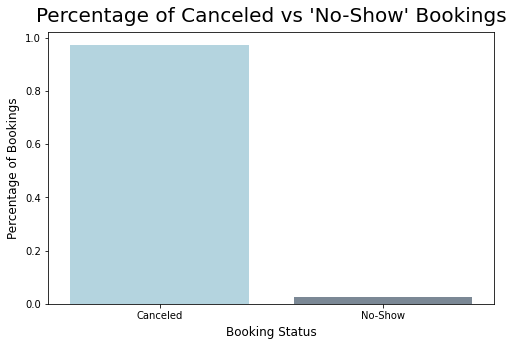

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Canceled vs 'No-Show' Bookings", fontsize = 20, pad = 10)
sns.barplot(x=df[df['is_canceled']==1]['reservation_status'].unique(), 
            y=df[df['is_canceled']==1]['reservation_status'].value_counts(normalize=True), 
            palette=['lightblue', 'lightslategrey'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

<strong>Kết luận

<p>- Phần lớn các phòng bị hủy trước khi đến
<p>- Các dữ liệu chứa giá trị "No -Show" không đáng kể, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên có thể xóa nó đi.

<li>Thống kê hệ số tương quan giữa giá trị hủy đặt phòng với các thuộc tính còn lại

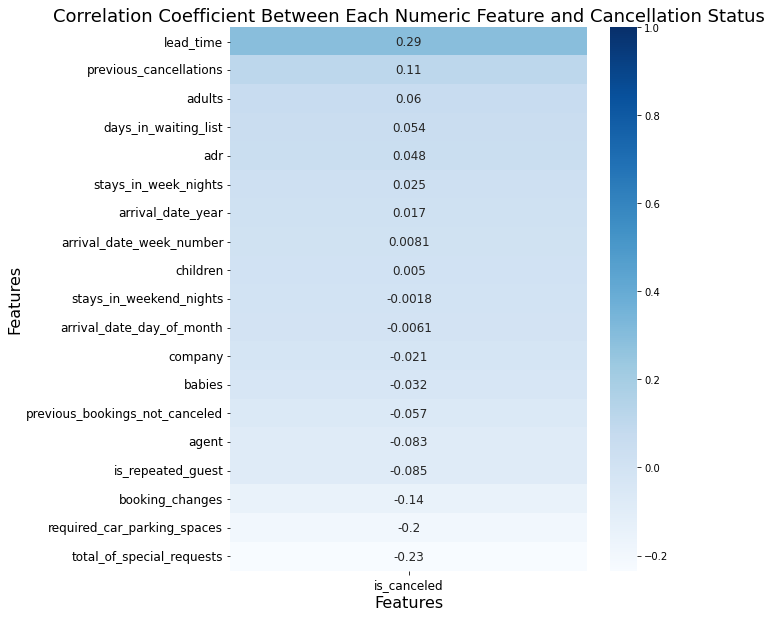

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(df.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), 
                 annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

<strong>Kết luận

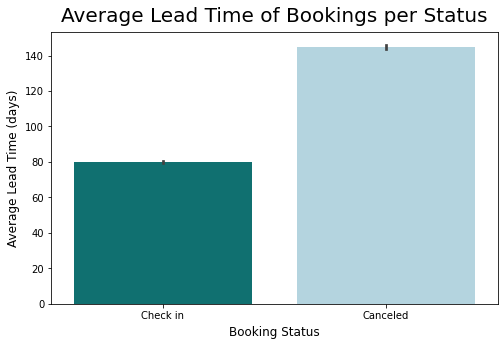

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['lead_time'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Check in', 'Canceled']);

<p>- lead_time có mối tương quan cao nhất với việc có hủy đặt phòng hay không. Có nghĩa là số ngày giữa thời điểm đặt phòng và ngày đến dự kiến tăng lên, khách hàng càng có nhiều thời gian hơn để hủy đặt phòng và có nhiều thời gian hơn để phát sinh các tình huống không lường trước được kế hoạch du lịch

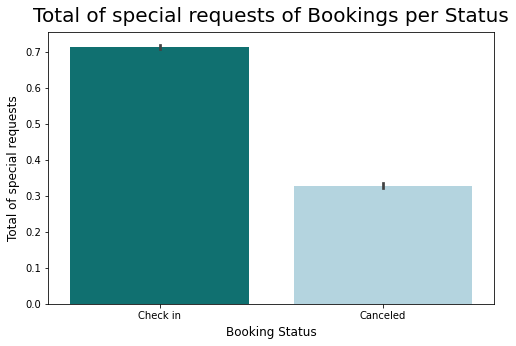

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Total of special requests of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['total_of_special_requests'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Total of special requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Check in', 'Canceled']);

<p>- total_of_special_requests là thuộc tính có mối tương quan khá mạnh với thuộc tính quyết định hủy hay nhận phòng. Khi số lượng các yêu cầu đặc biệt được thực hiện tăng lên, khả năng phòng bị hủy sẽ giảm xuống. Điều này cho thấy rằng sự gắn bó với khách sạn trước khi đến và cảm thấy nhu cầu của họ được lắng nghe có thể khiến khách hàng ít có khả năng hủy đặt phòng hơn.

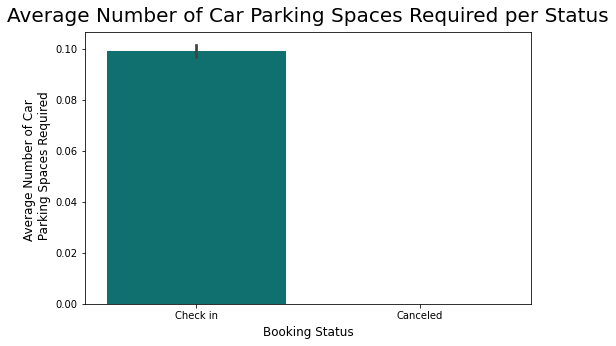

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['required_car_parking_spaces'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Check in', 'Canceled']);

<p>- required_car_parking_spaces có mối tương quan mạnh thứ ba với mục tiêu hủy đặt phòng. Khi số lượng yêu cầu chỗ đậu xe tăng lên, khả năng đặt chỗ bị hủy sẽ giảm xuống. Tương tự số lượng yêu cầu đặc biệt, sẽ có ý nghĩa rằng khách hàng càng gắn bó với khách snaj thì khả năng họ hủy đặt phòng càng thấp. 
<p>- Các dữ liệu chứa giá trị ảnh hưởng đến kết quả "canceled" không đáng kể, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên có thể xóa nó đi.

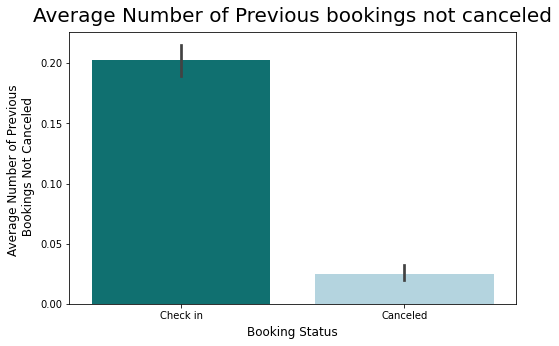

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Previous bookings not canceled", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['previous_bookings_not_canceled'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Previous \n Bookings Not Canceled", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Check in', 'Canceled']);

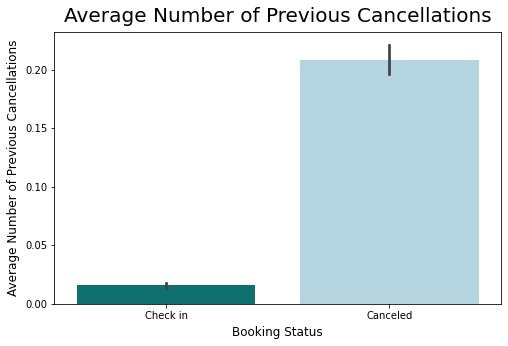

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Previous Cancellations", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['previous_cancellations'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Previous Cancellations", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Check in', 'Canceled']);

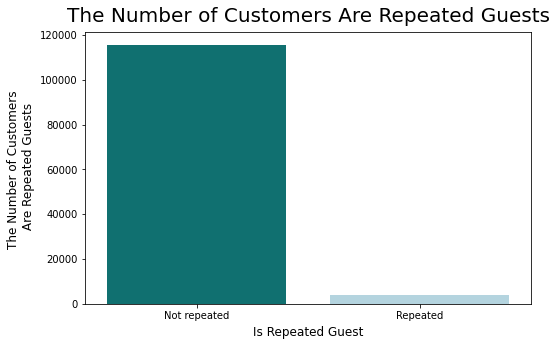

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("The Number of Customers Are Repeated Guests", fontsize = 20, pad = 10)
sns.countplot(data = df, x = 'is_repeated_guest', palette=['teal', 'lightblue'])
plt.xlabel("Is Repeated Guest", fontsize = 12, labelpad = 5)
plt.ylabel("The Number of Customers \n Are Repeated Guests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not repeated', 'Repeated']);

<p>- Hầu hết các khách hàng đều không quay trở lại hoặc là khách hàng lần đầu tiên đến khách sạn đó

<strong>Kết luận:</strong>

<p>- Từ ba biểu đồ trên, lịch sử đặt phòng trước đó previous_cancellations, previous_bookings_not_canceled và thông tin khách hàng quay trở lại is_repeated_guest không ảnh hưởng nhiều đến biến quyết định.
<p>- Các dữ liệu chứa giá trị ảnh hưởng đến kết quả "canceled" không đáng kể, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên có thể xóa nó đi.

<li>Thống kê tỷ lệ phòng bị hủy

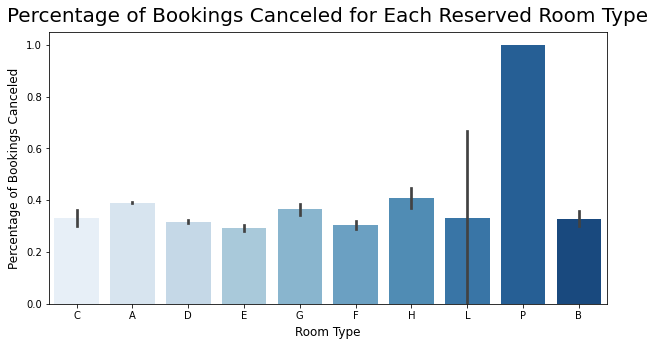

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type", fontsize = 20, pad = 10)
sns.barplot(x=df['reserved_room_type'], y=df['is_canceled'], palette='Blues')
plt.xlabel("Room Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

<strong>Kết luận

<p>- Tỷ lệ hách hàng hủy đặt cao nhất đối với phòng P và thấp nhất đối với phòng E.

<li>Thống kê giá phòng qua đêm mỗi tháng của hai loại khách sạn

In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [ ]:
final_hotel = city_hotel
final_hotel["price_resort"]= resort_hotel["adr"]
final_hotel.rename(index=str,columns={'adr':'price_city'},inplace=True)
final_hotel

,arrival_date_month,price_city,price_resort
0,April,111.856824,75.867816
1,August,118.412083,181.205892
2,December,87.856764,68.322236
3,February,86.183025,54.147478
4,January,82.160634,48.708919
5,July,115.563810,150.122528
6,June,117.702075,107.921869
7,March,90.170722,57.012487
8,May,120.445842,76.657558
9,November,86.500456,48.681640


In [ ]:
plt.figure(figsize = (17, 8))
px.line(final_hotel, x = 'arrival_date_month', y = ['price_resort','price_city'],
        title = 'Room price per night over the Months')

<Figure size 1224x576 with 0 Axes>

<strong>Kết luận</strong>
<p>- Từ thang 9 đến tháng 6 năm sau, doanh thu các phòng ở city cao hơn ở resort.
<p>- Tỷ lệ thay đổi từ tháng 6 đến tháng 9, doanh thu cao nhất khoảng 180 $ vào tháng 8

<li>Thống kê tỷ lệ hủy đặt phòng với từng loại hình thức đặt cọc

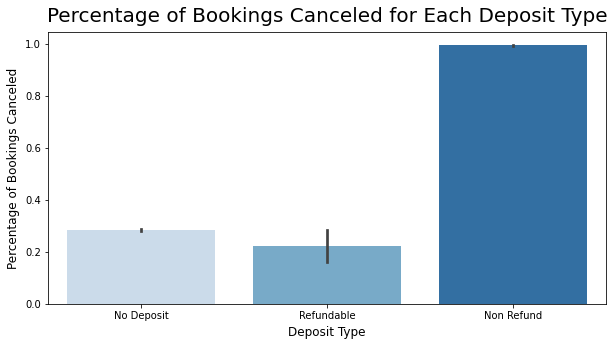

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Deposit Type", fontsize = 20, pad = 10)
sns.barplot(x=df['deposit_type'], y=df['is_canceled'], palette='Blues')
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

<strong>Kết luận

<p>- Lượng khách hàng hủy đặt cọc không hoàn lại lại có tỷ lệ không nhận phòng cao nhất.
<p>- Tỷ lệ hủy đặt phòng ở hai giá trị còn lại xấp xỉ nhau.

<li>Thống kê tỷ lệ phần trăm của các giá trị trong thuộc tính phân khúc thị trường với tình trạng hủy đặt phòng và nhận phòng

In [ ]:
labels = ["Aviation", "Complementary", "Corporate", "Groups", "Direct", "Offline TA/TO", "Online TA"]

canceled = df[df['is_canceled']==1][['market_segment']]
canceled = canceled.market_segment.value_counts().sort_values()

not_canceled = df[df['is_canceled']==0][['market_segment']]
not_canceled = not_canceled.market_segment.value_counts().sort_values()

In [ ]:
not_canceled

Aviation           185
Complementary      646
Corporate         4303
Groups            7714
Direct           10672
Offline TA/TO    15908
Online TA        35738
Name: market_segment, dtype: int64

In [ ]:
canceled

Undefined            2
Aviation            52
Complementary       97
Corporate          992
Direct            1934
Offline TA/TO     8311
Groups           12097
Online TA        20739
Name: market_segment, dtype: int64

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=canceled, name="Canceled"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=not_canceled, name="Check-in"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Distribution of Checkin and Canceled reservations by Market Segment",
    annotations=[dict(text='Canceled', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Check-in', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

<strong>Kết luận

<p>- Hầu hết các thao tác đặt phòng và hủy phòng đều thông qua hình thức online.
<p>- Tỷ lệ phân khúc thị trường ở hai trạng thái nahanj phòng và hủy phòng tỷ lệ thuận với nhau

<li>Thống kê thời gian chờ và tổng doanh thu của khách sạn

In [ ]:
fig = px.scatter(df, x="lead_time", y="adr", color='is_canceled')
fig.show()

<strong> Kết luận</strong>
<p>- Thời gian càng lâu thì khả năng hủy đăth phòng càng cao
<p>- Hầu hết doanh thu của các đơn đặt phòng thấp hơn 1000 $


<li>Sơ đồ thể hiện sự phân bố của các khách trên thế giới trong dữ liệu Hotel Booking Demand

<strong>Thống kê tên các quốc gia và số lượng du khách từ các quốc gia đó

In [ ]:
guest_city = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

,Country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


<strong> Vẽ biểu đồ phân bố lượng du khách đó

In [ ]:
df["country"].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

<strong>Kết luận </strong>
<p>- Hầu hết khách đến từ Portugal (Bồ Đào Nha) và các nước khác ở châu Âu
<p>- Có thể thấy thuộc tính country có đến 178 giá trị khác nhau, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên có thể xóa nó đi.

<li>Kiểm tra mức độ xảy ra ngoại lệ của mỗi thuộc tính 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
col_dict = { 
'lead_time' : 1,   
'days_in_waiting_list' : 2,       
'stays_in_weekend_nights' : 3,                
'stays_in_week_nights' : 4,                     
'adults' : 5,                                 
'children' : 6,                                
'babies' : 7,                                  
'previous_cancellations' : 8,                 
'previous_bookings_not_canceled' : 9,                      
'booking_changes' : 10,                    
'required_car_parking_spaces' : 11,            
'total_of_special_requests' : 12,     
'adr' : 13
}

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


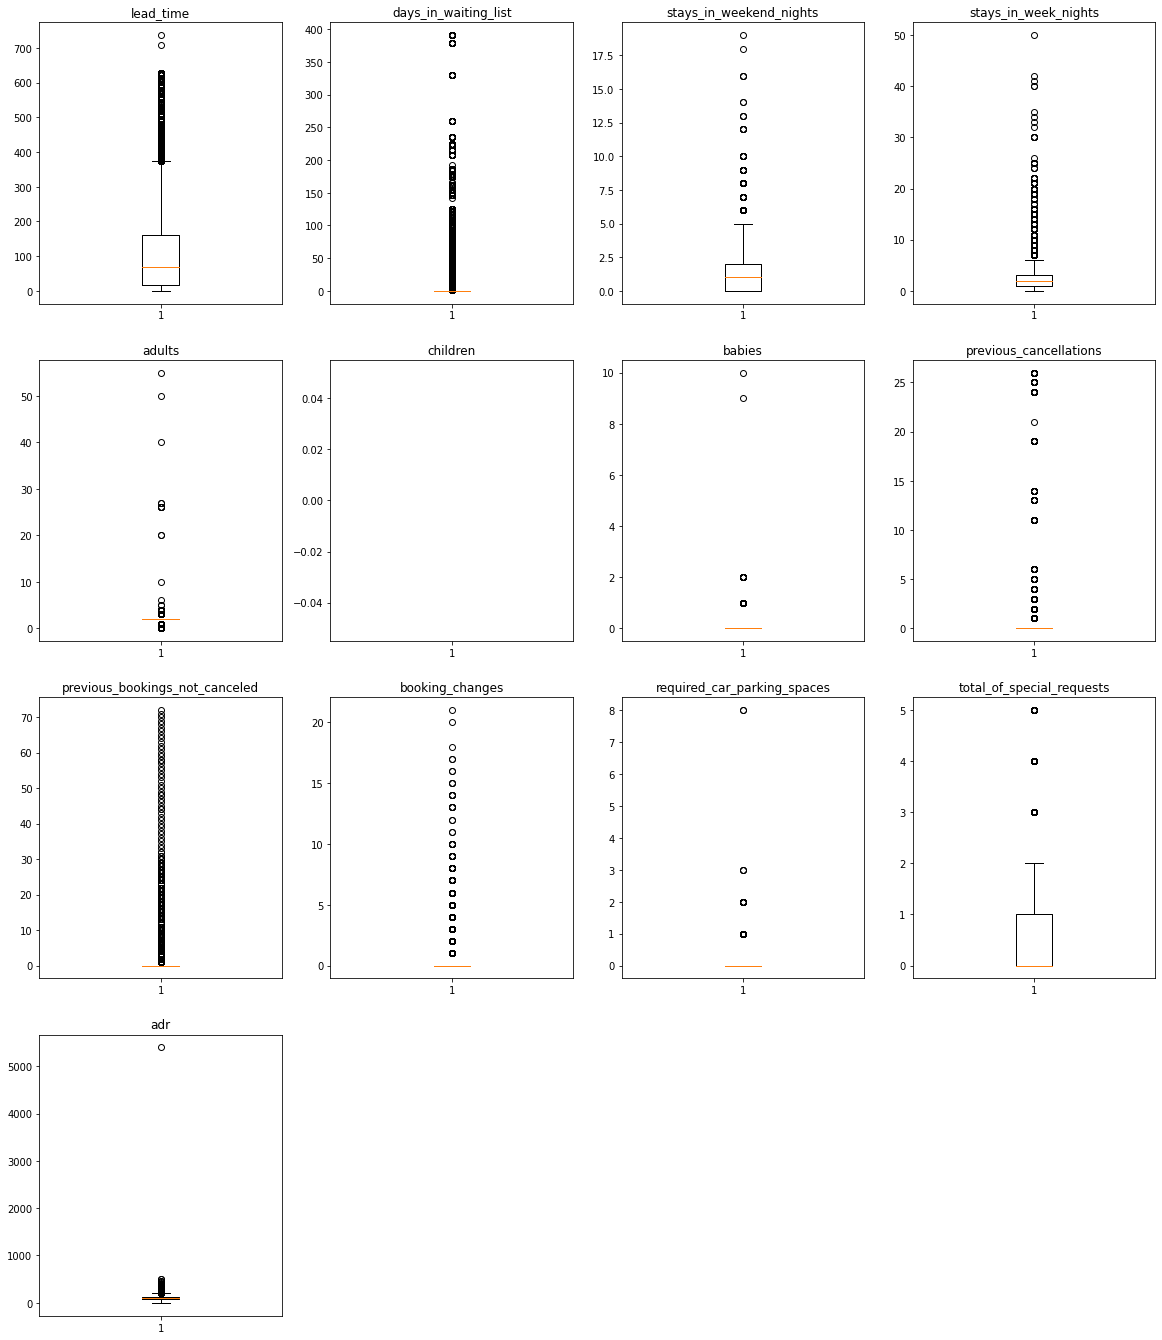

In [ ]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

Trong đó, số lượng ngoại lệ và phân trăm số lượng ngoại lệ đó chiếm là

In [ ]:
len(df)

119390

In [ ]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0])),len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0]))*100/len(df)))

Number of outliers and percentage of it in lead_time : 3005 and 2.5169612195326243
Number of outliers and percentage of it in days_in_waiting_list : 3698 and 3.097411843537985
Number of outliers and percentage of it in stays_in_weekend_nights : 265 and 0.22196163832816818
Number of outliers and percentage of it in stays_in_week_nights : 3354 and 2.8092805092553816
Number of outliers and percentage of it in adults : 29710 and 24.88483122539576
Number of outliers and percentage of it in children : 0 and 0.0
Number of outliers and percentage of it in babies : 917 and 0.768071027724265
Number of outliers and percentage of it in previous_cancellations : 6484 and 5.430940614791859
Number of outliers and percentage of it in previous_bookings_not_canceled : 3620 and 3.0320797386715803
Number of outliers and percentage of it in booking_changes : 18076 and 15.140296507245163
Number of outliers and percentage of it in required_car_parking_spaces : 7416 and 6.211575508836586
Number of outliers and

<strong>Loại bỏ ngoại lệ bằng phương pháp Winsorization

<p>- Tạo một dataframe mới từ tập dữ liệu cũ để tiến hành loại bỏ các ngoại lệ

In [ ]:
df_win = df.copy()

In [ ]:
def winsorize(data, lower_limit, upper_limit): 
    #lower_limit - Percentile of value to be capped at the lower end
    #upper_limit - Percentile of value to be capped at the higher end
    
    num_df=data.select_dtypes(include=[np.number]) #Seperating the numerical variables
    
    for col in num_df:
        
        #Plotting Boxplot before capping the outliers
        plt.figure(figsize=(16,4))
        plt.subplot(143)
        sns.boxplot(num_df[col])
        plt.title('Before')
        plt.legend()
        
        lower_bound= num_df[col].quantile(lower_limit) #Getting the value of lower bound for the given percentile of lower limit
        upper_bound= num_df[col].quantile(1-upper_limit) #Getting the value of upper bound for the given percentile of upper limit
        print("The lower bound and upper bound of %s is %.2f,%.2f" %(col,lower_bound,upper_bound))
        no_out=np.sum(num_df[col]<lower_bound)+np.sum(num_df[col]>upper_bound)#Calculating the number of outliers 
        print("No.of outliers in %s column: %d"%(col,no_out))
        
        #Capping outliers with percentiles
        #Syntax: np.where(condition;if true;if false)
        #if value greater then upper whisker, replace it with upper whisker value or if it is lesser then lower whisker replce it with lower whisker value
        num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,
                             np.where(num_df[col]<lower_bound,lower_bound,num_df[col]))
        
        # #Plotting Boxplot after capping the outliers
        # plt.subplot(144)
        # sns.boxplot(num_df[col])
        # plt.title('After')
        # plt.tight_layout()
        # plt.show()
        
    

In [ ]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
        lower_bound = df[col].quantile(from_low_end)
        upper_bound = df[col].quantile(1-from_high_end)
        
        df[col] = np.where(df[col]>upper_bound, upper_bound,
                 np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [ ]:
cols = [
'lead_time',   
'days_in_waiting_list',     
'stays_in_weekend_nights',               
'stays_in_week_nights',                 
'adults',                                
'babies',                               
'previous_cancellations',                
'previous_bookings_not_canceled',                     
'booking_changes',                  
'required_car_parking_spaces',            
'total_of_special_requests',     
'adr']

In [ ]:
percentile_capping(df_win, cols, 0.2, 0.2)

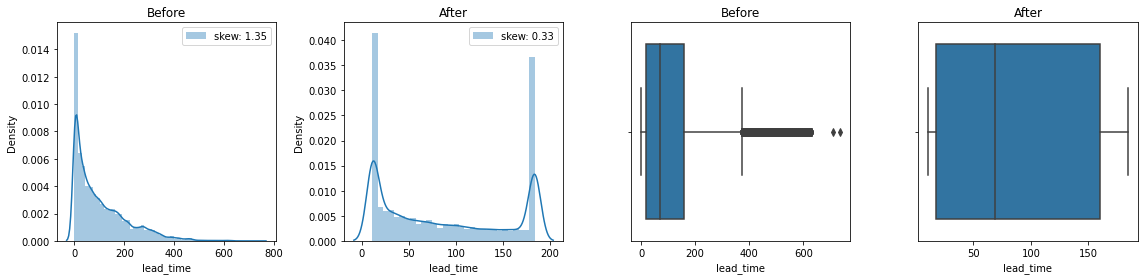

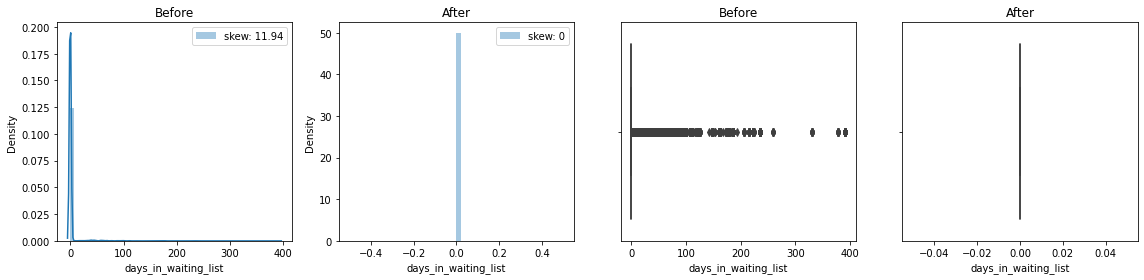

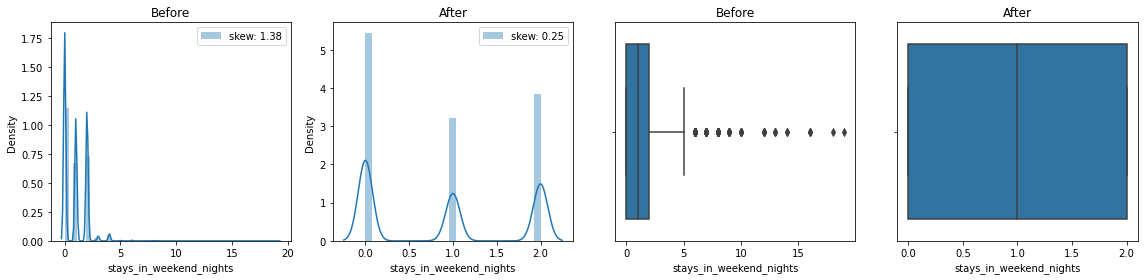

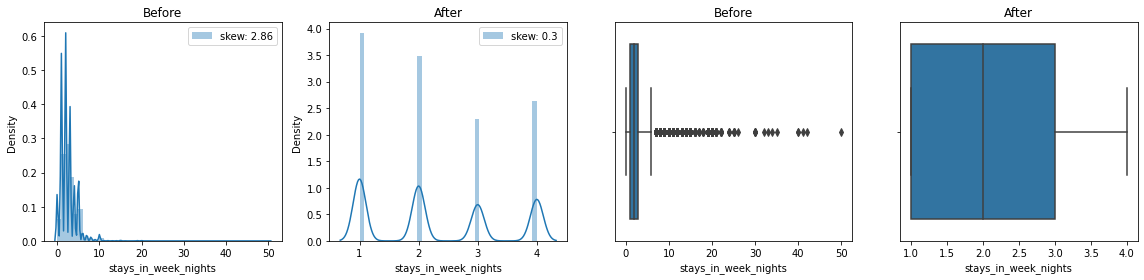

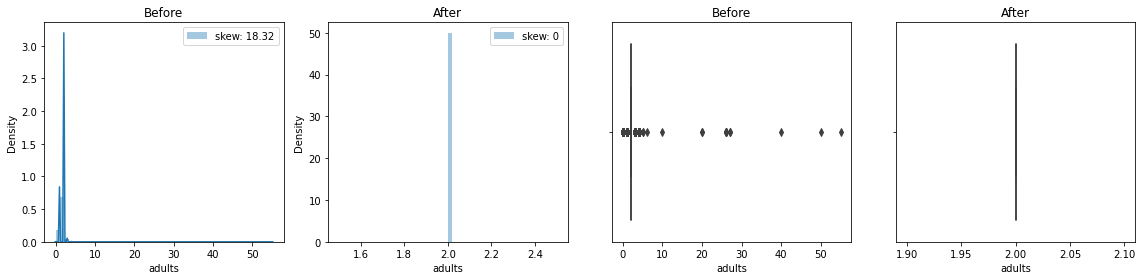

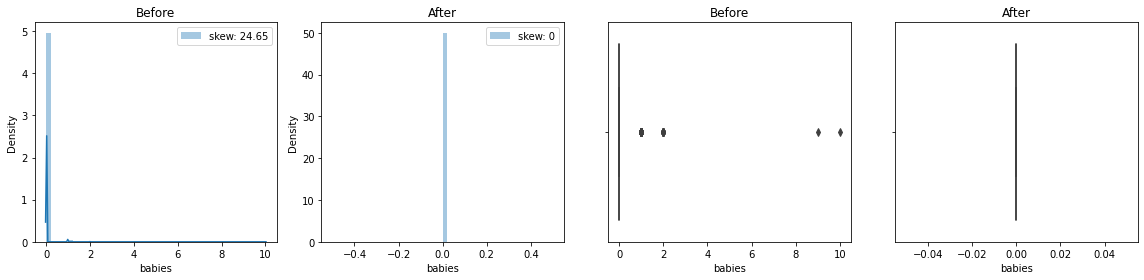

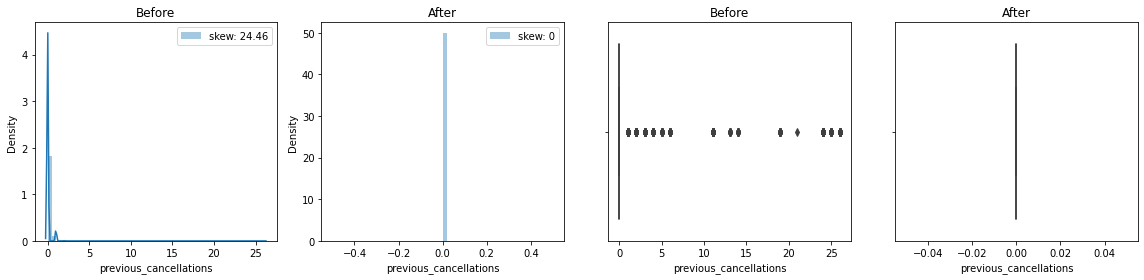

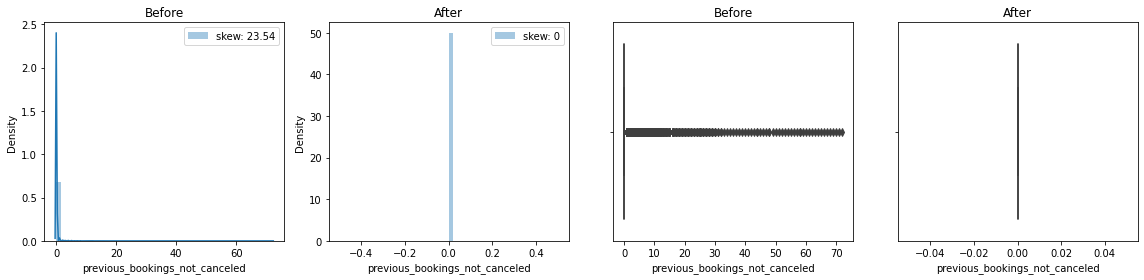

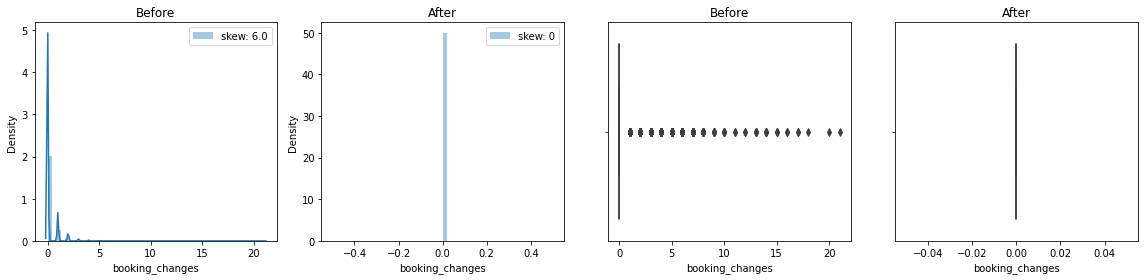

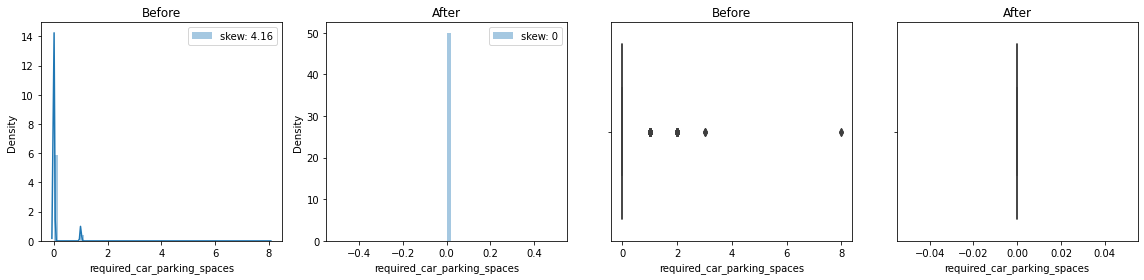

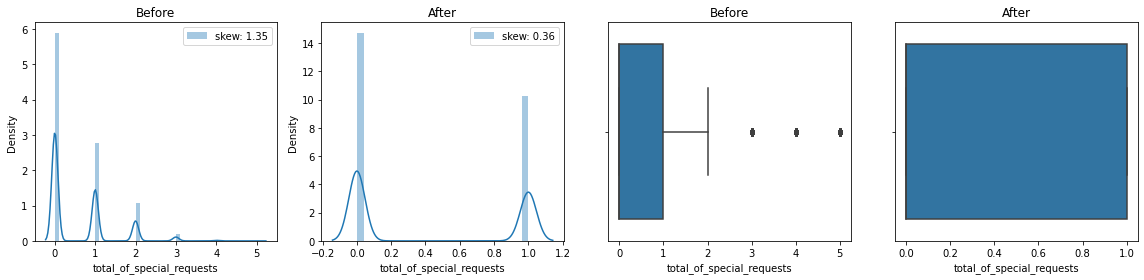

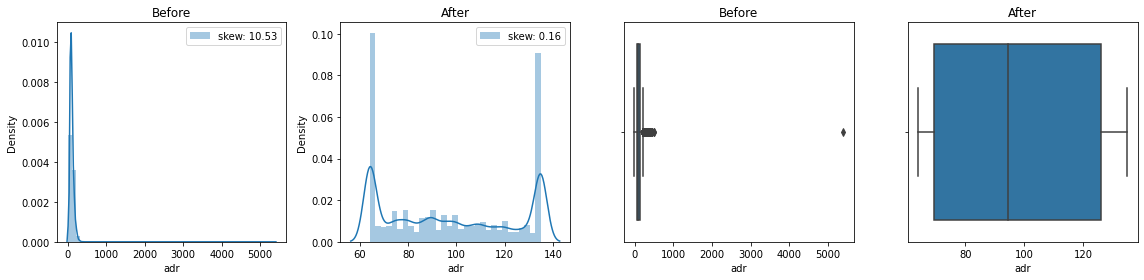

In [ ]:
for col in cols:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_win[col], label="skew: " + str(np.round(df_win[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_win[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df_win.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.0,0.00,0.000,1.0,1.0
lead_time,119390.0,86.205729,67.469602,11.0,18.00,69.000,160.0,184.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.0,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.0,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.0,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.872418,0.852765,0.0,0.00,1.000,2.0,2.0
stays_in_week_nights,119390.0,2.295578,1.127427,1.0,1.00,2.000,3.0,4.0
adults,119390.0,2.000000,0.000000,2.0,2.00,2.000,2.0,2.0
children,119386.0,0.103890,0.398561,0.0,0.00,0.000,0.0,10.0
babies,119390.0,0.000000,0.000000,0.0,0.00,0.000,0.0,0.0


<li>Vẽ biểu đồ Scatter tìm mối quan hệ giữa các thuộc tính độc lập với biến phụ thuộc là is_canceled

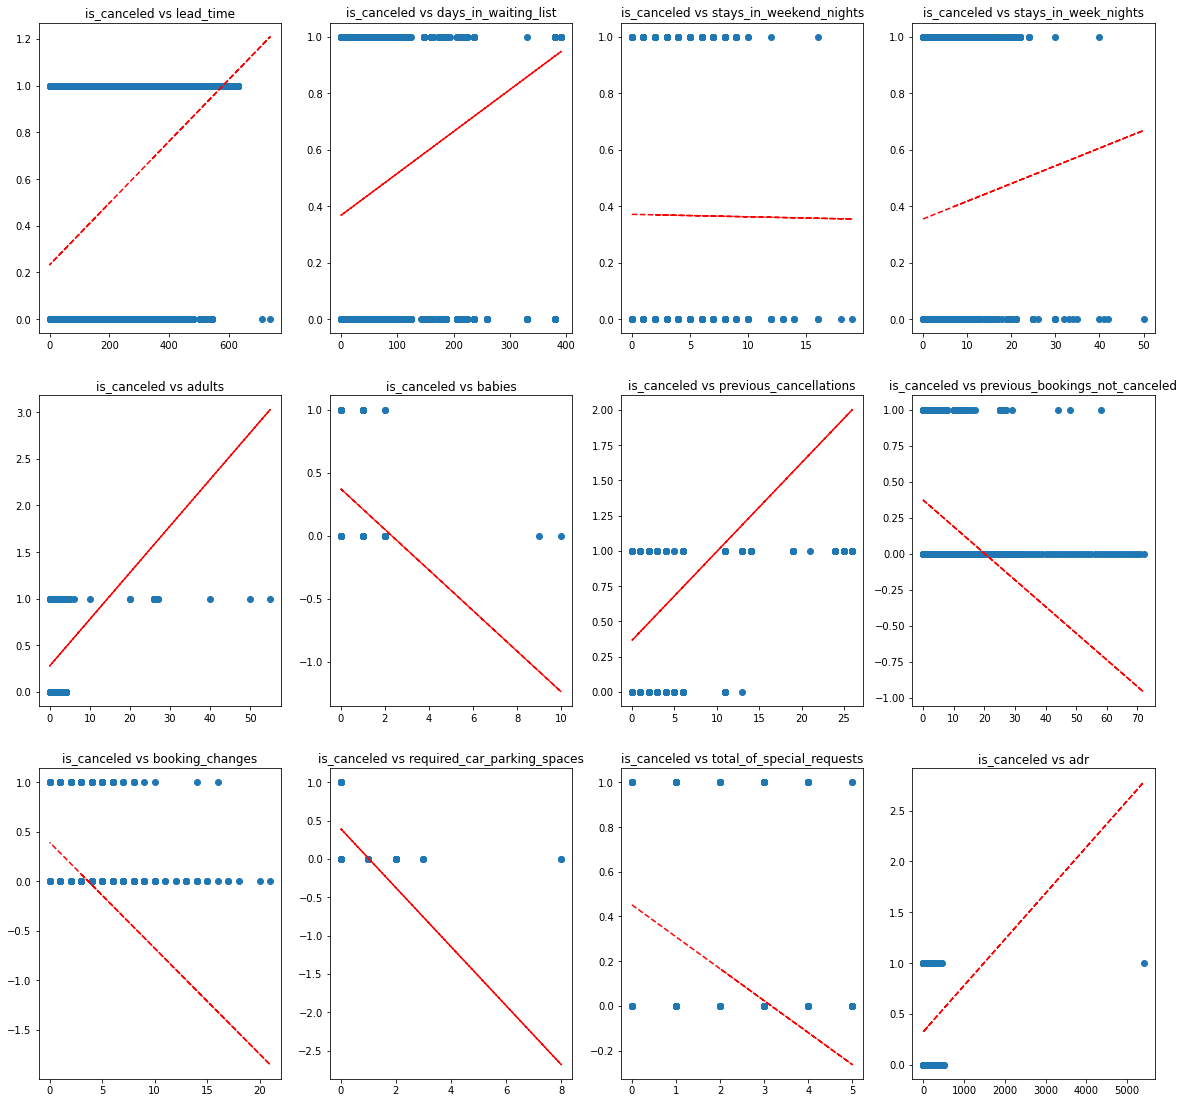

In [ ]:
plt.figure(figsize=(20,40))

count = 1
for variable in cols:
  plt.subplot(6,4,count)
  x = df[variable]
  y = df["is_canceled"]
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  plt.scatter(x, y)
  plt.title("is_canceled vs "+ variable)
  plt.plot(x,p(x),"r--")
  count = count + 1

plt.show()

<h3>Làm sạch dữ liệu

<li>Sử dụng phương pháp Snake Cae để định dạng lại các dối tượng và loại bỏ các khoảng trống dư thừa

<strong>Tạo một hàng định dạng lại tên các đối tượng

In [ ]:
# def camel_to_snake(name):
#     name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
#     return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

<strong>Định dạng lại các thuộc tính

In [ ]:
# df.columns = df.columns.map(camel_to_snake)

<strong>Xóa các khoảng trống dư thừa

In [ ]:
features = ['meal', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company']
for feature in features: 
    df[feature] = df[feature].astype(str).str.strip()

<li>Kiểm tra tại cùng một thời điểm thì các thuộc tính adults, children, babies có cùng lúc bằng 0 hay không? Nếu có thì phải xóa những dòng dữ liệu đó vì không hợp lý

<strong>Cột filter dùng để kiểm tra có sự tồn tại của cùng lúc bằng 0 của các thuộc tính về số lượng người

In [ ]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
filter

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

<strong>Xuất ra các dòng có giá trị True trong cột thuộc tính filter

In [ ]:
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,Transient-Party,0.00,0,0,Check-Out,2015-10-06,Colleen Hernandez,Colleen.H25@yandex.com,863-349-5397,************8042
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,Transient,0.00,0,0,Check-Out,2015-10-12,Mark Martinez,Martinez.Mark@yahoo.com,969-893-1222,************9670
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,Transient-Party,0.00,0,0,Check-Out,2015-11-23,Carrie Carney,CarrieCarney@yandex.com,944-344-7905,************8964
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,Transient-Party,0.00,0,0,Check-Out,2016-01-04,Summer Stewart,Stewart_Summer84@aol.com,125-574-6642,************1069
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,Transient-Party,0.00,0,0,Check-Out,2016-01-05,Brian Buchanan,Brian.B@yahoo.com,946-176-5726,************9836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,Transient,100.80,0,0,Check-Out,2017-06-30,Gregory Ashley,GregoryAshley51@outlook.com,784-717-9035,************9561
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,Transient,0.00,1,1,Check-Out,2017-07-01,Christina Mcdonald,Mcdonald.Christina@protonmail.com,487-056-2442,************8308
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,Transient,73.80,0,0,Check-Out,2017-07-17,Megan Johnson,MJohnson@protonmail.com,501-374-4690,************3910
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,Transient-Party,22.86,0,1,Check-Out,2017-07-22,Alexandra Riley,Alexandra.Riley55@mail.com,318-771-9720,************6778


<strong>Xóa các dòng có giá trị True đó

In [ ]:
df = df[~filter]

<li>Xử lý các dữ liệu bị thiếu 

<strong>Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)

<strong>Tổng giá trị null của một cột/ số dòng của cột null đó 

In [ ]:
percent_1=df.isnull().sum()/df.isnull().count()*100

<strong>Làm tròn 1 chữ số và sort giảm dần

In [ ]:
percent_2 = (round(percent_1,1)).sort_values(ascending = False)

<strong>Xuất 5 thuộc tính có số lượng giá trị rỗng nhiều nhất

In [ ]:
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
country,478,0.4
children,4,0.0
hotel,0,0.0
booking_changes,0,0.0
deposit_type,0,0.0


<strong>Kết luận: Có hai thuộc tính chứa dữ liệu bị thiếu

<p>- Thuộc tính Children: có 4 giá trị bị thiếu
<p>- Thuộc tính Country có 488 giá trị bị thiếu, chiếm hơn 10% dữ liệu bị thiếu.

<strong>Giải pháp

<p>- Đối với thuộc tính Country, do có kiểu dữ liệu thuộc lớp nominal của nhóm định tính nên ta dùng mode để điền vào những ô còn trống

<p> &emsp;Xem xét thông tin thuộc tính Country

In [ ]:
df['country'].describe()

count     118732
unique       177
top          PRT
freq       48483
Name: country, dtype: object

<p> &emsp;Nhận thấy rằng, giá trị "PRT" phổ biến nhất nên ta chọn giá trị đó để điền vào các vị trí còn trống trong thuộc tính country

In [ ]:
df['country'].fillna(df['country'].mode().to_string(), inplace=True)

<p>- Đối với thuộc tính Children, do số lượng giá trị Null quá ít với tỷ lệ xấp xỉ 0% nên ta loại bỏ các dòng dữ liệu đó sẽ không ảnh hưởng đến kết quả của dữ liệu 

In [ ]:
df.dropna(subset=['children'], inplace=True)

<li>Xử lý giá trị NaN

<strong>Giải thích

<p>- Trên Kaggle có nói, đây là dữ liệu thực của khách sạn nên tất cả các yếu tố liên quan đến việc nhận dạng khách sạn sẽ bị xóa và dữ liệu khách hàng là các giá trị ảo. Nên các thuộc tính còn lại khi không có giá trị không phải là giá trị thiếu mà chỉ là không được sử dụng. 

<p> &emsp;Thay thế giá trị NaN trong cột Agent thành "No Agent"

In [ ]:
df['agent'].replace(to_replace='nan', value='No Agent', inplace=True)

<p> &emsp;Thay thế giá trị NaN trong cột Agent thành "No Company"

In [ ]:
df['company'].replace(to_replace='nan', value='No Company', inplace=True)

<li>Kiểm tra thuộc tính của dữ liệu

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<strong>Nhận xét

<p>- Quan sát kiểu dữ liệu, ta nhận thấy kiểu dữ liệu của thuộc tính children là float trong khi đó số lượng người phải là một số tự nhiên nên ta cần đổi kiểu dữ liệu cho thuộc tính này

In [ ]:
df['children'] = df['children'].astype(int)

<p>- Tương tự, đối với thuộc tính reservation_status_date, đây là kiểu dữ liệu ngày nhưng lại có kiểu dữ liệu là object, có thể gây ảnh hưởng trong quá trình phân tích nên ta tiếp tục thay đổi kiểu dữ liệu

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

<li>Xử lý các dữ liệu bị trùng lặp

<p>- Trong thực tế, một tập dữ liệu không nên giữ các dòng dữ liệu trùng lặp

<strong>Kiểm tra dữ liệu trùng

In [ ]:
df.duplicated().any()

False

<strong>Nhận xét

<p>- Dataset không chứa các dữ liệu trùng 

<li> Xóa các dữ liệu Undefined

<strong>Thay thế giá trị Undefined thành NaN

In [ ]:
df.replace('Undefined', np.nan, inplace=True)

<p>Giá trị bằng <strong>Undefined</strong> không có ý nghĩa trong quá trình khai thác và xử lý dữ liệu về nhu cầu đặt phòng tại khách sạn nên ta xóa các giá trị <strong>Undefined</strong> đó, dữ liệu kiểu chuỗi rất quan trọng không thể thay thế như kiểu số bằng giá trị trung bình hay giá trị phổ biến nhất. Có hai cách xử lý kiểu <strong>Undefined</strong> chuỗi là xóa bỏ các dòng dữ liệu khỏi dataframe hoặc xem xét tỷ lệ các giá trị còn lại là bao nhiêu rồi thay thế <strong>Undefined</strong> theo đúng tỷ lệ đó.

In [ ]:
df = df.dropna()

<li>Biến đổi dataframe

<strong>Chuyển đổi thuộc tính arrival_date_month thành số

In [ ]:
months = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
for dataset in [df]:
    dataset["arrival_date_month"] = dataset["arrival_date_month"].map(months)

<strong>Tạo thuộc tính arrival_date_full kiểu dữ liệu datetime thông qua ba thuộc tính: arrival_date_year, arrival_date_month và arrival_date_day_of_month

In [ ]:
cols=["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]
df['arrival_date_full'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df['arrival_date_full'] = pd.to_datetime(df['arrival_date_full'])

<strong>Tạo thuộc tính total_nights là tổng của stay_in_weekend_nights và stay_in_week_nights

In [ ]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

<strong>Tạo thuộc tính party_size là tổng số lượng người trong các đặc trưng adults, children, babies

In [ ]:
df['party_size'] = df['adults'] + df['children'] + df['babies']

<strong>Tạo thuộc tính is_family dựa trên các thuốc tính children, babies có số lượng nhiều hơn 0 trong tập dữ liệu

In [ ]:
df['is_family'] = ((df['children'] != 0) | (df['babies'] != 0)) * 1

<strong>Tạo thuộc tính room_difference: là sự kết hợp giữa hai thuộc tính reserved_room_type và assigned_room_type chỉ ra liệu có sự khác biệt giữa số phòng đã đặt trước và phòng đã chỉ định của khách hay không.

In [ ]:
df['room_difference'] = (df['reserved_room_type'] != df['assigned_room_type']) * 1

<strong>Tạo thuộc tính status_minus_arrival_date là sự chênh lệch giữa arrival_date_full (ngày đến) và reservation_status_date (ngày thay đổi trạng thái gần nhất).
<p>- Nếu khách hàng nhận phòng thì status_minus_arrival_date là số ngày khách hàng nghỉ lại tại khách sạn
<p>- Nếu khách hàng hủy đặt phòng thì status_minus_arrival_date là số ngày trước khi đến nên mà khách hàng đã hủy đặt phòng

In [ ]:
df['status_minus_arrival_date'] = np.abs(df['arrival_date_full'] - df['reservation_status_date']).astype(str)
def format_lenght(date):
    return date[0]
df['status_minus_arrival_date'] = df['status_minus_arrival_date'].map(format_lenght).astype(int)

<li>Xóa dữ liệu về thông tin cá nhân khách hàng vì đây chỉ là dữ liệu ảo

In [ ]:
df = df.drop([ "name", "email", "phone-number", "credit_card"], axis = 1)

<h3>Tiếp tục xử lý dữ liệu để chuẩn bị cho việc áp dụng các thuật toán

<li>Xóa các thuộc tính không cần thiết



1. reservation_status
2. country
3. required_car_parking_spaces
4. arrival_date_year, arrival_date_week_number, arrival_date_day_of_month vì đã dùng các thuộc tính này để tạo arrival_date_full
5. arrival_date_full, reservation_status_date vì đã dùng các thuộc tính này để tạo status_minus_arrival_date
6. reserved_room_type, assigned_room_type vì đã tạo thuộc tính room_difference
7. children, babies vì đã dùng các thuộc tính này để tạo thuộc tính party_size và is_family
8. days_in_waiting_list vì thuộc tính này không cần thiết trong quá trình phân tích
9. Thuộc tính agent và company chứa các dữ liệu không được định nghĩa cao nên sẽ loại bỏ các cột này
10.  stays_in_weekend_nights và stays_in_week_nights vì dùng các thuộc tính này để tạo total_nights



In [ ]:
df=df.drop(['reservation_status', 'days_in_waiting_list', 'required_car_parking_spaces', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies', 'country', 'reserved_room_type', 'assigned_room_type', 'agent', 'company', 'reservation_status_date', 'arrival_date_full'],axis=1)

<li>Rời rạc hóa dữ liệu

<strong>Lead_time

In [ ]:
df["lead_time"].describe()

count    118036.000000
mean        104.278729
std         107.140242
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

<p>- Vì lead_time có giá trị lớn nhất là 737 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df["lead_time"], q=4)

<p>- Ta chia làm 4 giỏ như sau: 

In [ ]:
test.value_counts()

(-0.001, 18.0]    29931
(69.0, 161.0]     29501
(161.0, 737.0]    29339
(18.0, 69.0]      29265
Name: lead_time, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần

In [ ]:
for dataset in [df]:
    dataset.loc[dataset['lead_time']<=18,'lead_time']=1
    dataset.loc[(dataset['lead_time']>18) & (dataset['lead_time']<=69),'lead_time']=2
    dataset.loc[(dataset['lead_time']>69) & (dataset['lead_time']<=161),'lead_time']=3
    dataset.loc[dataset['lead_time']>161,'lead_time']=4
    dataset['lead_time']=dataset['lead_time'].astype(int)

<strong>adr

In [ ]:
df["adr"].describe()

count    118036.000000
mean        102.070696
std          50.378407
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

<p>- Vì adr có giá trị lớn nhất là 5400 và nhỏ nhất là -6.38 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df["adr"], q=4)

<p>- Ta chia làm 4 giỏ như sau: 

In [ ]:
test.value_counts()

(-6.381, 70.0]     30453
(70.0, 95.0]       29972
(126.0, 5400.0]    28984
(95.0, 126.0]      28627
Name: adr, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần

In [ ]:
for dataset in [df]:
    dataset.loc[dataset['adr']<=69.5,'adr']=1
    dataset.loc[(dataset['adr']>69.5) & (dataset['adr']<=94.95),'adr']=2
    dataset.loc[(dataset['adr']>94.95) & (dataset['adr']<=126),'adr']=3
    dataset.loc[dataset['adr']>126,'adr']=4
    dataset['adr']=dataset['adr'].astype(int)

<strong>total_nights	

In [ ]:
df["total_nights"].describe()

count    118036.000000
mean          3.417915
std           2.535943
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64

<p>- Vì total_nights có giá trị lớn nhất là 69 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df["total_nights"], q=4)

<p>- Ta chia làm 4 giỏ như sau: 

In [ ]:
test.value_counts()

(-0.001, 2.0]    49106
(2.0, 3.0]       26486
(4.0, 69.0]      25152
(3.0, 4.0]       17292
Name: total_nights, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần

In [ ]:
for dataset in [df]:
    dataset.loc[dataset['total_nights']<=2,'total_nights']=1
    dataset.loc[(dataset['total_nights']>2) & (dataset['total_nights']<=3),'total_nights']=2
    dataset.loc[(dataset['total_nights']>3) & (dataset['total_nights']<=4),'total_nights']=3
    dataset.loc[dataset['total_nights']>4,'total_nights']=4
    dataset['total_nights']=dataset['total_nights'].astype(int)

<strong>adults

In [ ]:
df["adults"].describe()

count    118036.000000
mean          1.859543
std           0.576141
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

<p>- Vì adults có giá trị lớn nhất là 55 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df["adults"], q=2)

<p>- Ta chia làm 2 giỏ như sau: 

In [ ]:
test.value_counts()

(-0.001, 2.0]    111800
(2.0, 55.0]        6236
Name: adults, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 2 cho các khoảng tăng dần

In [ ]:
for dataset in [df]:
    dataset.loc[dataset['adults']<=2,'adults']=1
    dataset.loc[dataset['adults']>2,'adults']=2
    dataset['adults']=dataset['adults'].astype(int)

<strong>party_size	

In [ ]:
df["party_size"].describe()

count    118036.000000
mean          1.972034
std           0.720126
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: party_size, dtype: float64

<p>- Vì party_size có giá trị lớn nhất là 55 và nhỏ nhất là 1 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df["party_size"], q=2)

<p>- Ta chia làm 2 giỏ như sau: 

In [ ]:
test.value_counts()

(0.999, 2.0]    103560
(2.0, 55.0]      14476
Name: party_size, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 2 cho các khoảng tăng dần

In [ ]:
for dataset in [df]:
    dataset.loc[dataset['party_size']<=2,'party_size']=1
    dataset.loc[dataset['party_size']>2,'party_size']=2
    dataset['party_size']=dataset['party_size'].astype(int)

<strong>status_minus_arrival_date	

In [ ]:
df["status_minus_arrival_date"].describe()

count    118036.000000
mean          3.069835
std           2.132294
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max           9.000000
Name: status_minus_arrival_date, dtype: float64

<p>- Vì status_minus_arrival_date có giá trị lớn nhất là 9 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df["status_minus_arrival_date"], q=3)

<p>- Ta chia làm 3 giỏ như sau: 

In [ ]:
test.value_counts()

(-0.001, 2.0]    57778
(2.0, 4.0]       34624
(4.0, 9.0]       25634
Name: status_minus_arrival_date, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 3 cho các khoảng tăng dần

In [ ]:
for dataset in [df]:
    dataset.loc[dataset['status_minus_arrival_date']<=2,'status_minus_arrival_date']=1
    dataset.loc[(dataset['status_minus_arrival_date']>2) & (dataset['status_minus_arrival_date']<=4),'status_minus_arrival_date']=2
    dataset.loc[dataset['status_minus_arrival_date']>4,'status_minus_arrival_date']=3
    dataset['status_minus_arrival_date']=dataset['status_minus_arrival_date'].astype(int)

In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,customer_type,adr,total_of_special_requests,total_nights,party_size,is_family,room_difference,status_minus_arrival_date
0,Resort Hotel,0,4,7,1,BB,Direct,Direct,0,0,...,3,No Deposit,Transient,1,0,1,1,0,0,1
1,Resort Hotel,0,4,7,1,BB,Direct,Direct,0,0,...,4,No Deposit,Transient,1,0,1,1,0,0,1
2,Resort Hotel,0,1,7,1,BB,Direct,Direct,0,0,...,0,No Deposit,Transient,2,0,1,1,0,1,1
3,Resort Hotel,0,1,7,1,BB,Corporate,Corporate,0,0,...,0,No Deposit,Transient,2,0,1,1,0,0,1
4,Resort Hotel,0,1,7,1,BB,Online TA,TA/TO,0,0,...,0,No Deposit,Transient,3,1,1,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118036 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           118036 non-null  object
 1   is_canceled                     118036 non-null  int64 
 2   lead_time                       118036 non-null  int64 
 3   arrival_date_month              118036 non-null  int64 
 4   adults                          118036 non-null  int64 
 5   meal                            118036 non-null  object
 6   market_segment                  118036 non-null  object
 7   distribution_channel            118036 non-null  object
 8   is_repeated_guest               118036 non-null  int64 
 9   previous_cancellations          118036 non-null  int64 
 10  previous_bookings_not_canceled  118036 non-null  int64 
 11  booking_changes                 118036 non-null  int64 
 12  deposit_type                  

<h3>Thực hiện Sampling tập dữ liệu

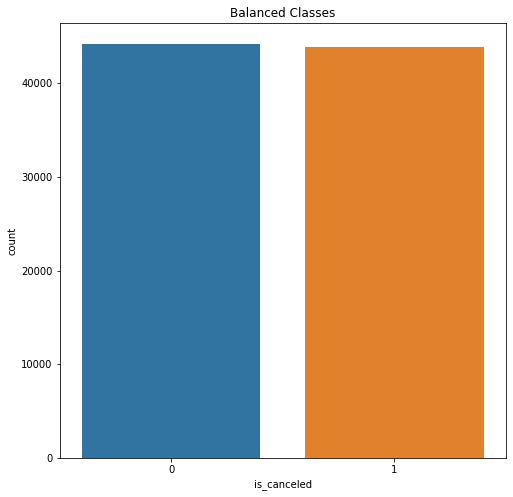

In [ ]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
Canceled_df = shuffled_df.loc[shuffled_df['is_canceled'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
NonCanceled_df = shuffled_df.loc[shuffled_df['is_canceled'] == 0].sample(n=df_win["is_canceled"].value_counts()[1],random_state=42)

# Concatenate both dataframes again
sampling_win_df = pd.concat([Canceled_df, NonCanceled_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('is_canceled', data=sampling_win_df)
plt.title('Balanced Classes')
plt.show()

<h3>Xuất file kết quả xử lý ra file csv

In [ ]:
sampling_win_df.to_csv("/content/drive/My Drive/Năm 3/Làm nhóm HK2 2021 - 2022/Cá nhân/Khai thác dữ liệu/Project/DataCleaning/duLieuDaXuLy.csv")

<h1>Thực hiện Sampling 

---

<h3>Tương tự, ta thực hiện xóa và rời rạc dữ liệu trên tập df_win để tiến hành so sánh kết quả trước khi xử lý outlier và sau khi xử lý outlier




<h3>Làm sạch dữ liệu

<li>Sử dụng phương pháp Snake Cae để định dạng lại các dối tượng và loại bỏ các khoảng trống dư thừa

<strong>Định dạng lại các thuộc tính

In [ ]:
# df_win.columns = df_win.columns.map(camel_to_snake)

<strong>Xóa các khoảng trống dư thừa

In [ ]:
features = ['meal', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company']
for feature in features: 
    df_win[feature] = df_win[feature].astype(str).str.strip()

<li>Kiểm tra tại cùng một thời điểm thì các thuộc tính adults, children, babies có cùng lúc bằng 0 hay không? Nếu có thì phải xóa những dòng dữ liệu đó vì không hợp lý

<strong>Cột filter dùng để kiểm tra có sự tồn tại của cùng lúc bằng 0 của các thuộc tính về số lượng người

In [ ]:
filter = (df_win.children == 0) & (df_win.adults == 0) & (df_win.babies == 0)
filter

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

<strong>Xuất ra các dòng có giá trị True trong cột thuộc tính filter

In [ ]:
df_win[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


<strong>Xóa các dòng có giá trị True đó

In [ ]:
df_win = df_win[~filter]

<li>Xử lý các dữ liệu bị thiếu 

<strong>Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm

In [ ]:
total = df_win.isnull().sum().sort_values(ascending=False)

<strong>Tổng giá trị null của một cột/ số dòng của cột null đó 

In [ ]:
percent_1=df_win.isnull().sum()/df_win.isnull().count()*100

<strong>Làm tròn 1 chữ số và sort giảm dần

In [ ]:
percent_2 = (round(percent_1,1)).sort_values(ascending = False)

<strong>Xuất 5 thuộc tính có số lượng giá trị rỗng nhiều nhất

In [ ]:
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
country,488,0.4
children,4,0.0
hotel,0,0.0
booking_changes,0,0.0
deposit_type,0,0.0


<strong>Kết luận: Có hai thuộc tính chứa dữ liệu bị thiếu

<p>- Thuộc tính Country có 488 giá trị bị thiếu, chiếm hơn 10% dữ liệu bị thiếu.

<strong>Giải pháp

<p>- Đối với thuộc tính Country, do có kiểu dữ liệu thuộc lớp nominal của nhóm định tính nên ta dùng mode để điền vào những ô còn trống

<p> &emsp;Xem xét thông tin thuộc tính Country

In [ ]:
df_win['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

<p> &emsp;Nhận thấy rằng, giá trị "PRT" phổ biến nhất nên ta chọn giá trị đó để điền vào các vị trí còn trống trong thuộc tính country

In [ ]:
df_win['country'].fillna(df_win['country'].mode().to_string(), inplace=True)

<p>- Đối với thuộc tính Children, do số lượng giá trị Null quá ít với tỷ lệ xấp xỉ 0% nên ta loại bỏ các dòng dữ liệu đó sẽ không ảnh hưởng đến kết quả của dữ liệu 

In [ ]:
df_win.dropna(subset=['children'], inplace=True)

<li>Xử lý giá trị NaN

<strong>Giải thích

<p>- Trên Kaggle có nói, đây là dữ liệu thực của khách sạn nên tất cả các yếu tố liên quan đến việc nhận dạng khách sạn sẽ bị xóa và dữ liệu khách hàng là các giá trị ảo. Nên các thuộc tính còn lại khi không có giá trị không phải là giá trị thiếu mà chỉ là không được sử dụng. 

<p> &emsp;Thay thế giá trị NaN trong cột Agent thành "No Agent"

In [ ]:
df_win['agent'].replace(to_replace='nan', value='No Agent', inplace=True)

<p> &emsp;Thay thế giá trị NaN trong cột Comany thành "No Company"

In [ ]:
df_win['company'].replace(to_replace='nan', value='No Company', inplace=True)

<li>Kiểm tra thuộc tính của dữ liệu

In [ ]:
df_win.dtypes

hotel                              object
is_canceled                         int64
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   float64
deposit_type                       object
agent                             

<strong>Nhận xét

<p>- Quan sát kiểu dữ liệu, ta nhận thấy kiểu dữ liệu của một số thuộc tính là float trong khi đó số lượng phải là một số tự nhiên nên ta cần đổi kiểu dữ liệu cho thuộc tính này

In [ ]:
df_win['children'] = df_win['children'].astype(int)
df_win['adults'] = df_win['adults'].astype(int)
df_win['babies'] = df_win['babies'].astype(int)
df_win['stays_in_weekend_nights'] = df_win['stays_in_weekend_nights'].astype(int)
df_win['stays_in_week_nights'] = df_win['stays_in_week_nights'].astype(int)
df_win['booking_changes'] = df_win['booking_changes'].astype(int)
df_win['days_in_waiting_list'] = df_win['days_in_waiting_list'].astype(int)
df_win['required_car_parking_spaces'] = df_win['required_car_parking_spaces'].astype(int)
df_win['total_of_special_requests'] = df_win['total_of_special_requests'].astype(int)

<p>- Tương tự, đối với thuộc tính reservation_status_date, đây là kiểu dữ liệu ngày nhưng lại có kiểu dữ liệu là object, có thể gây ảnh hưởng trong quá trình phân tích nên ta tiếp tục thay đổi kiểu dữ liệu

In [ ]:
df_win['reservation_status_date'] = pd.to_datetime(df_win['reservation_status_date'])

<li>Xử lý các dữ liệu bị trùng lặp

<p>- Trong thực tế, một tập dữ liệu không nên giữ các dòng dữ liệu trùng lặp

<strong>Kiểm tra dữ liệu trùng

In [ ]:
df_win.duplicated().any()

False

<strong>Nhận xét

<p>- Dataset không chứa các dữ liệu trùng 

<li> Xóa các dữ liệu Undefined

<strong>Thay thế giá trị Undefined thành NaN

In [ ]:
df_win.replace('Undefined', np.nan, inplace=True)

<p>Giá trị bằng <strong>Undefined</strong> không có ý nghĩa trong quá trình khai thác và xử lý dữ liệu về nhu cầu đặt phòng tại khách sạn nên ta xóa các giá trị <strong>Undefined</strong> đó, dữ liệu kiểu chuỗi rất quan trọng không thể thay thế như kiểu số bằng giá trị trung bình hay giá trị phổ biến nhất. Có hai cách xử lý kiểu <strong>Undefined</strong> chuỗi là xóa bỏ các dòng dữ liệu khỏi dataframe hoặc xem xét tỷ lệ các giá trị còn lại là bao nhiêu rồi thay thế <strong>Undefined</strong> theo đúng tỷ lệ đó.

In [ ]:
df_win = df_win.dropna()

<li>Biến đổi dataframe

<strong>Chuyển đổi thuộc tính arrival_date_month thành số

In [ ]:
months = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
for dataset in [df_win]:
    dataset["arrival_date_month"] = dataset["arrival_date_month"].map(months)

<strong>Tạo thuộc tính arrival_date_full kiểu dữ liệu datetime thông qua ba thuộc tính: arrival_date_year, arrival_date_month và arrival_date_day_of_month

In [ ]:
cols=["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]
df_win['arrival_date_full'] = df_win[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_win['arrival_date_full'] = pd.to_datetime(df_win['arrival_date_full'])

<strong>Tạo thuộc tính total_nights là tổng của stay_in_weekend_nights và stay_in_week_nights

In [ ]:
df_win['total_nights'] = df_win['stays_in_week_nights'] + df_win['stays_in_weekend_nights']

<strong>Tạo thuộc tính party_size là tổng số lượng người trong các đặc trưng adults, children, babies

In [ ]:
df_win['party_size'] = df_win['adults'] + df_win['children'] + df_win['babies']

<strong>Tạo thuộc tính is_family dựa trên các thuốc tính children, babies có số lượng nhiều hơn 0 trong tập dữ liệu

In [ ]:
df_win['is_family'] = ((df_win['children'] != 0) | (df_win['babies'] != 0)) * 1

<strong>Tạo thuộc tính room_difference: là sự kết hợp giữa hai thuộc tính reserved_room_type và assigned_room_type chỉ ra liệu có sự khác biệt giữa số phòng đã đặt trước và phòng đã chỉ định của khách hay không.

In [ ]:
df_win['room_difference'] = (df_win['reserved_room_type'] != df_win['assigned_room_type']) * 1

<strong>Tạo thuộc tính status_minus_arrival_date là sự chênh lệch giữa arrival_date_full (ngày đến) và reservation_status_date (ngày thay đổi trạng thái gần nhất).
<p>- Nếu khách hàng nhận phòng thì status_minus_arrival_date là số ngày khách hàng nghỉ lại tại khách sạn
<p>- Nếu khách hàng hủy đặt phòng thì status_minus_arrival_date là số ngày trước khi đến nên mà khách hàng đã hủy đặt phòng

In [ ]:
df_win['status_minus_arrival_date'] = np.abs(df_win['arrival_date_full'] - df_win['reservation_status_date']).astype(str)
def format_lenght(date):
    return date[0]
df_win['status_minus_arrival_date'] = df_win['status_minus_arrival_date'].map(format_lenght).astype(int)

<li>Xóa dữ liệu về thông tin cá nhân khách hàng vì đây chỉ là dữ liệu ảo

In [ ]:
df_win = df_win.drop([ "name", "email", "phone-number", "credit_card"], axis = 1)

<h3>Tiếp tục xử lý dữ liệu để chuẩn bị cho việc áp dụng các thuật toán

<li>Xóa các thuộc tính không cần thiết



1. reservation_status
2. country
3. required_car_parking_spaces
4. arrival_date_year, arrival_date_week_number, arrival_date_day_of_month vì đã dùng các thuộc tính này để tạo arrival_date_full
5. arrival_date_full, reservation_status_date vì đã dùng các thuộc tính này để tạo status_minus_arrival_date
6. reserved_room_type, assigned_room_type vì đã tạo thuộc tính room_difference
7. children, babies vì đã dùng các thuộc tính này để tạo thuộc tính party_size và is_family
8. days_in_waiting_list vì thuộc tính này không cần thiết trong quá trình phân tích
9. Thuộc tính agent và company chứa các dữ liệu không được định nghĩa cao nên sẽ loại bỏ các cột này
10.  stays_in_weekend_nights và stays_in_week_nights vì dùng các thuộc tính này để tạo total_nights



In [ ]:
df_win=df_win.drop(['reservation_status', 'days_in_waiting_list', 'required_car_parking_spaces', 'arrival_date_year', 'arrival_date_week_number', 
                    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies', 'country', 
                    'reserved_room_type', 'assigned_room_type', 'agent', 'company', 'reservation_status_date', 'arrival_date_full'],axis=1)

<li> Chuẩn hóa dữ liệu

In [ ]:
df_win.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118216.0,0.371642,0.483245,0.0,0.0,0.0,1.0,1.0
lead_time,118216.0,86.254568,67.538980,11.0,18.0,69.0,161.0,184.0
arrival_date_month,118216.0,6.561295,3.076907,1.0,4.0,7.0,9.0,12.0
adults,118216.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
is_repeated_guest,118216.0,0.031958,0.175890,0.0,0.0,0.0,0.0,1.0
previous_cancellations,118216.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
previous_bookings_not_canceled,118216.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
booking_changes,118216.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
adr,118216.0,97.382738,27.024751,64.0,69.6,95.0,126.0,135.0
total_of_special_requests,118216.0,0.413785,0.492513,0.0,0.0,0.0,1.0,1.0


In [ ]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [ ]:
cols1 = ["lead_time",  "adr","status_minus_arrival_date", "total_nights"]

In [ ]:
for col in cols1:
    df_win[col] = min_max_scaling(df_win[col])

In [ ]:
df_win.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118216.0,0.371642,0.483245,0.0,0.000000,0.000000,1.000000,1.0
lead_time,118216.0,0.434998,0.390399,0.0,0.040462,0.335260,0.867052,1.0
arrival_date_month,118216.0,6.561295,3.076907,1.0,4.000000,7.000000,9.000000,12.0
adults,118216.0,2.000000,0.000000,2.0,2.000000,2.000000,2.000000,2.0
is_repeated_guest,118216.0,0.031958,0.175890,0.0,0.000000,0.000000,0.000000,1.0
previous_cancellations,118216.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
previous_bookings_not_canceled,118216.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
booking_changes,118216.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
adr,118216.0,0.470179,0.380630,0.0,0.078873,0.436620,0.873239,1.0
total_of_special_requests,118216.0,0.413785,0.492513,0.0,0.000000,0.000000,1.000000,1.0


<li>Rời rạc hóa dữ liệu

<strong>Lead_time

In [ ]:
df_win["lead_time"].describe()

count    118216.000000
mean          0.434998
std           0.390399
min           0.000000
25%           0.040462
50%           0.335260
75%           0.867052
max           1.000000
Name: lead_time, dtype: float64

<p>- Vì lead_time có giá trị lớn nhất là 737 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df_win["lead_time"], q=4)

<p>- Ta chia làm 4 giỏ như sau: 

In [ ]:
test.value_counts()

(-0.001, 0.0405]    30053
(0.335, 0.867]      29518
(0.867, 1.0]        29356
(0.0405, 0.335]     29289
Name: lead_time, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần

In [ ]:
for dataset in [df_win]:
    dataset.loc[dataset['lead_time']<=0.0405,'lead_time']=1
    dataset.loc[(dataset['lead_time']>0.0405) & (dataset['lead_time']<=0.335),'lead_time']=2
    dataset.loc[(dataset['lead_time']>0.335) & (dataset['lead_time']<=1610.867),'lead_time']=3
    dataset.loc[dataset['lead_time']>0.867,'lead_time']=4
    dataset['lead_time']=dataset['lead_time'].astype(int)

<strong>adr

In [ ]:
["adr"].describe()df_win

count    118216.000000
mean          0.470179
std           0.380630
min           0.000000
25%           0.078873
50%           0.436620
75%           0.873239
max           1.000000
Name: adr, dtype: float64

<p>- Vì adr có giá trị lớn nhất là 5400 và nhỏ nhất là -6.38 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df_win["adr"], q=4)

<p>- Ta chia làm 4 giỏ như sau: 

In [ ]:
test.value_counts()

(0.0789, 0.437]     31043
(-0.001, 0.0789]    29556
(0.873, 1.0]        28988
(0.437, 0.873]      28629
Name: adr, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần

In [ ]:
for dataset in [df_win]:
    dataset.loc[dataset['adr']<=0.0789,'adr']=1
    dataset.loc[(dataset['adr']>0.0789) & (dataset['adr']<=0.437),'adr']=2
    dataset.loc[(dataset['adr']>0.437) & (dataset['adr']<=0.873),'adr']=3
    dataset.loc[dataset['adr']>0.873,'adr']=4
    dataset['adr']=dataset['adr'].astype(int)

<strong>total_nights	

In [ ]:
df_win["total_nights"].describe()

count    118216.000000
mean          0.432451
std           0.314520
min           0.000000
25%           0.200000
50%           0.400000
75%           0.600000
max           1.000000
Name: total_nights, dtype: float64

<p>- Vì total_nights có giá trị lớn nhất là 69 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df_win["total_nights"], q=4)

<p>- Ta chia làm 4 giỏ như sau: 

In [ ]:
test.value_counts()

(-0.001, 0.2]    46869
(0.2, 0.4]       28831
(0.6, 1.0]       24386
(0.4, 0.6]       18130
Name: total_nights, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 4 cho các khoảng tăng dần

In [ ]:
for dataset in [df_win]:
    dataset.loc[dataset['total_nights']<=0.2,'total_nights']=1
    dataset.loc[(dataset['total_nights']>0.2) & (dataset['total_nights']<=0.4),'total_nights']=2
    dataset.loc[(dataset['total_nights']>0.4) & (dataset['total_nights']<=0.6),'total_nights']=3
    dataset.loc[dataset['total_nights']>0.6,'total_nights']=4
    dataset['total_nights']=dataset['total_nights'].astype(int)

<strong>status_minus_arrival_date	

In [ ]:
df_win["status_minus_arrival_date"].describe()

count    118216.000000
mean          0.340899
std           0.237025
min           0.000000
25%           0.111111
50%           0.333333
75%           0.444444
max           1.000000
Name: status_minus_arrival_date, dtype: float64

<p>- Vì status_minus_arrival_date có giá trị lớn nhất là 9 và nhỏ nhất là 0 nên ta sẽ dùng phương pháp làm mịn binning

In [ ]:
test = pd.qcut(df_win["status_minus_arrival_date"], q=3)

<p>- Ta chia làm 3 giỏ như sau: 

In [ ]:
test.value_counts()

(-0.001, 0.222]    57905
(0.222, 0.444]     34644
(0.444, 1.0]       25667
Name: status_minus_arrival_date, dtype: int64

<p>-Các giỏ được đánh số theo số thứ tự từ 1 đến 3 cho các khoảng tăng dần

In [ ]:
for dataset in [df_win]:
    dataset.loc[dataset['status_minus_arrival_date']<=0.222,'status_minus_arrival_date']=1
    dataset.loc[(dataset['status_minus_arrival_date']>0.222) & (dataset['status_minus_arrival_date']<=0.444),'status_minus_arrival_date']=2
    dataset.loc[dataset['status_minus_arrival_date']>0.444,'status_minus_arrival_date']=3
    dataset['status_minus_arrival_date']=dataset['status_minus_arrival_date'].astype(int)

In [ ]:
df_win.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,customer_type,adr,total_of_special_requests,total_nights,party_size,is_family,room_difference,status_minus_arrival_date
0,Resort Hotel,0,4,7,2,BB,Direct,Direct,0,0.0,...,0,No Deposit,Transient,4,0,4,2,0,0,3
1,Resort Hotel,0,4,7,2,BB,Direct,Direct,0,0.0,...,0,No Deposit,Transient,4,0,4,2,0,0,3
2,Resort Hotel,0,4,7,2,BB,Direct,Direct,0,0.0,...,0,No Deposit,Transient,4,0,4,2,0,1,3
3,Resort Hotel,0,4,7,2,BB,Corporate,Corporate,0,0.0,...,0,No Deposit,Transient,4,0,4,2,0,0,3
4,Resort Hotel,0,4,7,2,BB,Online TA,TA/TO,0,0.0,...,0,No Deposit,Transient,4,1,4,2,0,0,3


In [ ]:
df_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118216 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118216 non-null  object 
 1   is_canceled                     118216 non-null  int64  
 2   lead_time                       118216 non-null  int64  
 3   arrival_date_month              118216 non-null  int64  
 4   adults                          118216 non-null  int64  
 5   meal                            118216 non-null  object 
 6   market_segment                  118216 non-null  object 
 7   distribution_channel            118216 non-null  object 
 8   is_repeated_guest               118216 non-null  int64  
 9   previous_cancellations          118216 non-null  float64
 10  previous_bookings_not_canceled  118216 non-null  float64
 11  booking_changes                 118216 non-null  int64  
 12  deposit_type    

<h3>Thực hiện Sampling tập dữ liệu

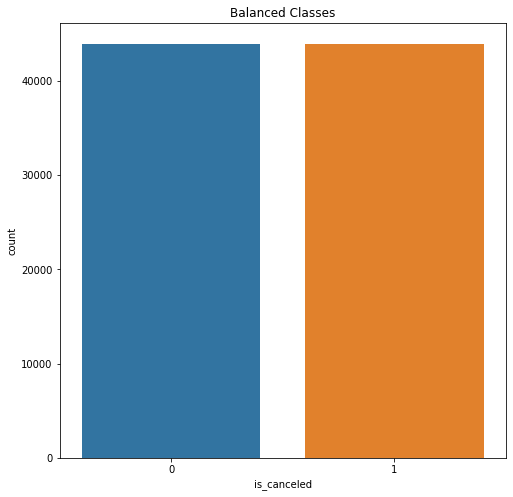

In [ ]:
# Shuffle the Dataset.
shuffled_df = df_win.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
Canceled_df = shuffled_df.loc[shuffled_df['is_canceled'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
NonCanceled_df = shuffled_df.loc[shuffled_df['is_canceled'] == 0].sample(n=df_win["is_canceled"].value_counts()[1],random_state=42)

# Concatenate both dataframes again
sampling_win_df = pd.concat([Canceled_df, NonCanceled_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('is_canceled', data=sampling_win_df)
plt.title('Balanced Classes')
plt.show()

<h3>Xuất file kết quả xử lý ra file csv

In [ ]:
df_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118216 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118216 non-null  object 
 1   is_canceled                     118216 non-null  int64  
 2   lead_time                       118216 non-null  int64  
 3   arrival_date_month              118216 non-null  int64  
 4   adults                          118216 non-null  int64  
 5   meal                            118216 non-null  object 
 6   market_segment                  118216 non-null  object 
 7   distribution_channel            118216 non-null  object 
 8   is_repeated_guest               118216 non-null  int64  
 9   previous_cancellations          118216 non-null  float64
 10  previous_bookings_not_canceled  118216 non-null  float64
 11  booking_changes                 118216 non-null  int64  
 12  deposit_type    

In [ ]:
df_win.head()

,hotel,is_canceled,lead_time,arrival_date_month,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,customer_type,adr,total_of_special_requests,total_nights,party_size,is_family,room_difference,status_minus_arrival_date
0,Resort Hotel,0,4,7,2,BB,Direct,Direct,0,0.0,...,0,No Deposit,Transient,4,0,4,2,0,0,3
1,Resort Hotel,0,4,7,2,BB,Direct,Direct,0,0.0,...,0,No Deposit,Transient,4,0,4,2,0,0,3
2,Resort Hotel,0,4,7,2,BB,Direct,Direct,0,0.0,...,0,No Deposit,Transient,4,0,4,2,0,1,3
3,Resort Hotel,0,4,7,2,BB,Corporate,Corporate,0,0.0,...,0,No Deposit,Transient,4,0,4,2,0,0,3
4,Resort Hotel,0,4,7,2,BB,Online TA,TA/TO,0,0.0,...,0,No Deposit,Transient,4,1,4,2,0,0,3


In [ ]:
df_win.to_csv("/content/drive/My Drive/Năm 3/Làm nhóm HK2 2021 - 2022/Cá nhân/Khai thác dữ liệu/Project/DataCleaning/duLieuDaXuLyWin.csv")